In [13]:
date()

[1] "Thu Nov 03 23:21:57 2016"

# 6
## 6.1
## 6.2

In [1]:
library(readr)

In [2]:
library(pipeR)

In [3]:
d <- readr::read_csv("data/chap06/data4a.csv")
str(d)

Parsed with column specification:
cols(
  N = col_integer(),
  y = col_integer(),
  x = col_double(),
  f = col_character()
)


Classes 'tbl_df', 'tbl' and 'data.frame':	100 obs. of  4 variables:
 $ N: int  8 8 8 8 8 8 8 8 8 8 ...
 $ y: int  1 6 5 6 1 1 3 6 0 8 ...
 $ x: num  9.76 10.48 10.83 10.94 9.37 ...
 $ f: chr  "C" "C" "C" "C" ...
 - attr(*, "spec")=List of 2
  ..$ cols   :List of 4
  .. ..$ N: list()
  .. .. ..- attr(*, "class")= chr  "collector_integer" "collector"
  .. ..$ y: list()
  .. .. ..- attr(*, "class")= chr  "collector_integer" "collector"
  .. ..$ x: list()
  .. .. ..- attr(*, "class")= chr  "collector_double" "collector"
  .. ..$ f: list()
  .. .. ..- attr(*, "class")= chr  "collector_character" "collector"
  ..$ default: list()
  .. ..- attr(*, "class")= chr  "collector_guess" "collector"
  ..- attr(*, "class")= chr "col_spec"


In [4]:
library(dplyr)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [5]:
d %>>% mutate(f = as.factor(f)) -> d
summary(d)

       N           y              x          f     
 Min.   :8   Min.   :0.00   Min.   : 7.660   C:50  
 1st Qu.:8   1st Qu.:3.00   1st Qu.: 9.338   T:50  
 Median :8   Median :6.00   Median : 9.965         
 Mean   :8   Mean   :5.08   Mean   : 9.967         
 3rd Qu.:8   3rd Qu.:8.00   3rd Qu.:10.770         
 Max.   :8   Max.   :8.00   Max.   :12.440         

In [6]:
library(ggplot2)
library(tidyr)

In [7]:
options(repr.plot.width = 4, repr.plot.height = 4)

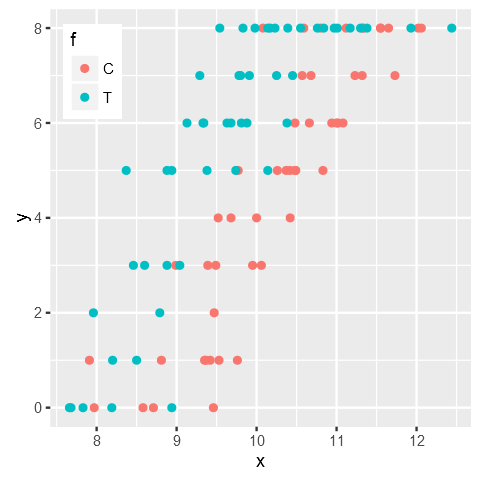

In [8]:
d %>>% ggplot(aes(x = x, y = y, group = f, colour = f)) + 
    geom_point() + 
    theme(
        legend.position = c(.1, .85)
    )

## 6.3

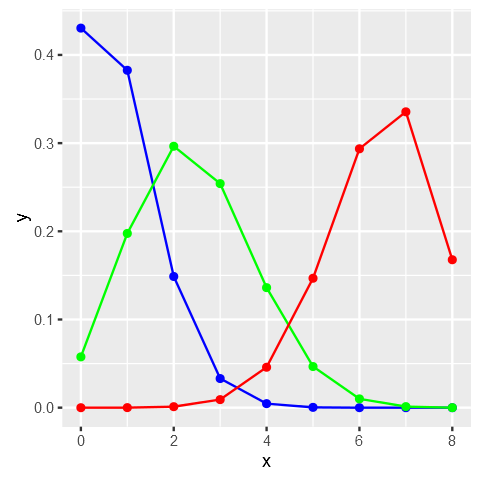

In [9]:
ggplot(data_frame(x = c(0:8)), aes(x)) + 
    stat_function(geom="line", n=9, fun = dbinom, args = list(size = 8, prob = 0.1), colour = "blue") +
    stat_function(geom="point", n=9, fun = dbinom, args = list(size = 8, prob = 0.1), colour = "blue") +
    stat_function(geom="line", n=9, fun = dbinom, args = list(size = 8, prob = 0.3), colour = "green") + 
    stat_function(geom="point", n=9, fun = dbinom, args = list(size = 8, prob = 0.3), colour = "green") + 
    stat_function(geom="line", n=9, fun = dbinom, args = list(size = 8, prob = 0.8), colour = "red") + 
    stat_function(geom="point", n=9, fun = dbinom, args = list(size = 8, prob = 0.8), colour = "red")

## 6.4
### 6.4.1

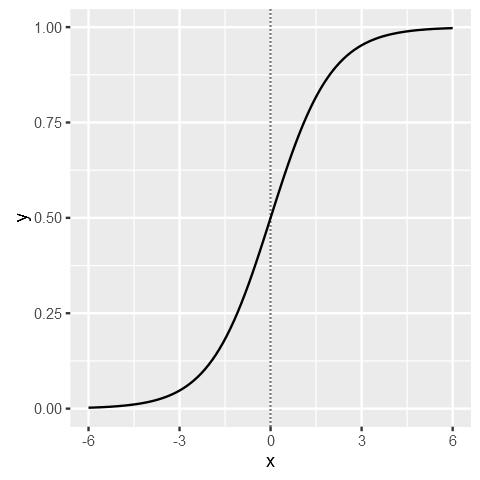

In [10]:
ggplot(data_frame(x = c(-6:6)), aes(x)) + 
    stat_function(geom = "line", fun = function(z){1 / (1 + exp(-z))}) + 
    geom_vline(xintercept = 0, linetype = "dotted")

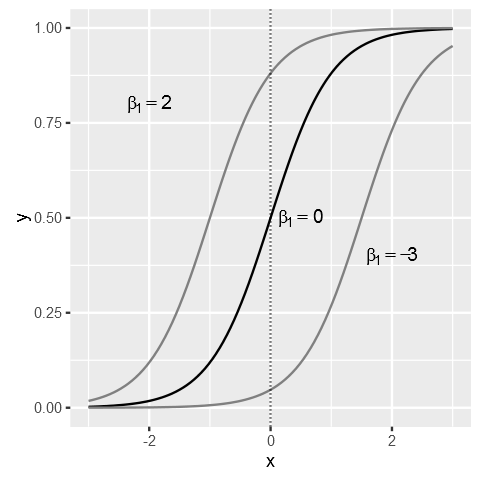

In [11]:
logistic <- function(x, beta1, beta2){1 / (1 + exp(-(beta1 + beta2 * x)))}
ggplot(data_frame(x = c(-3:3)), aes(x)) + 
    stat_function(geom = "line", fun = logistic, args = list(beta1 = 0, beta2 = 2)) + 
    stat_function(geom = "line", fun = logistic, args = list(beta1 = 2, beta2 = 2), colour = gray(0.5)) + 
    stat_function(geom = "line", fun = logistic, args = list(beta1 = -3, beta2 = 2), colour = gray(0.5)) + 
    geom_vline(xintercept = 0, linetype = "dotted") + 
    annotate(geom = "text", label = "beta[1]==0", x = 0.5, y = 0.5, parse = TRUE) + 
    annotate(geom = "text", label = "beta[1]==2", x = -2, y = 0.8, parse = TRUE) + 
    annotate(geom = "text", label = "beta[1]==-3", x = 2, y = 0.4, parse = TRUE)

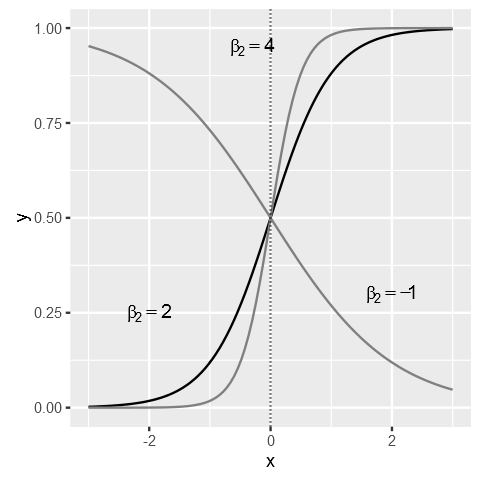

In [12]:
ggplot(data_frame(x = c(-3:3)), aes(x)) + 
    stat_function(geom = "line", fun = logistic, args = list(beta1 = 0, beta2 = 2)) + 
    stat_function(geom = "line", fun = logistic, args = list(beta1 = 0, beta2 = 4), colour = gray(0.5)) + 
    stat_function(geom = "line", fun = logistic, args = list(beta1 = 0, beta2 = -1), colour = gray(0.5)) + 
    geom_vline(xintercept = 0, linetype = "dotted") + 
    annotate(geom = "text", label = "beta[2]==2", x = -2, y = 0.25, parse = TRUE) + 
    annotate(geom = "text", label = "beta[2]==4", x = -0.3, y = 0.95, parse = TRUE) + 
    annotate(geom = "text", label = "beta[2]==-1", x = 2, y = 0.3, parse = TRUE)

### 6.4.2

In [29]:
fit.xf <- glm(cbind(y, N - y) ~ x + f, data = d, family = binomial)
fit.xf


Call:  glm(formula = cbind(y, N - y) ~ x + f, family = binomial, data = d)

Coefficients:
(Intercept)            x           fT  
    -19.536        1.952        2.022  

Degrees of Freedom: 99 Total (i.e. Null);  97 Residual
Null Deviance:	    499.2 
Residual Deviance: 123 	AIC: 272.2

In [24]:
options(repr.plot.width = 8)

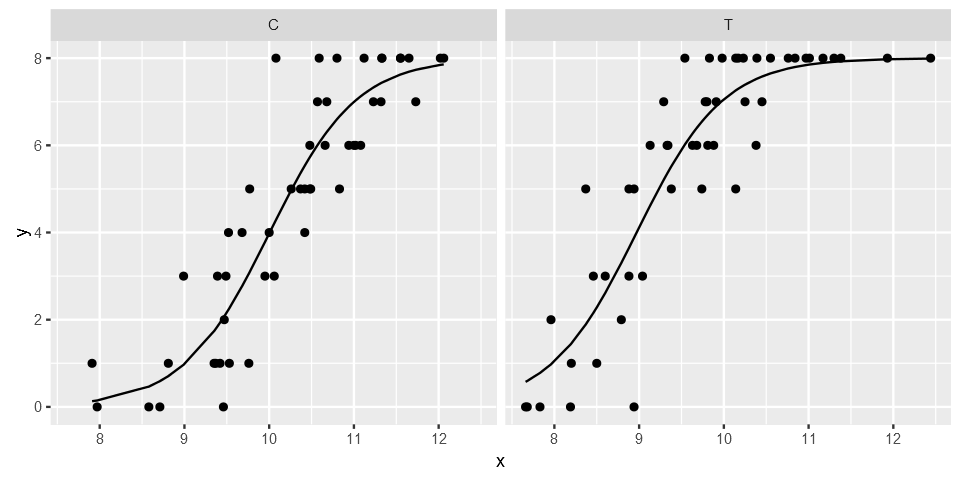

In [25]:
d %>>% 
    mutate(pred = predict(fit.xf, newdata = data_frame(x = d$x, f = d$f), type = "response")) %>>% 
    ggplot() + 
        geom_point(aes(x = x, y = y)) +
        geom_line(aes(x = x, y = max(N) * pred)) + 
        facet_wrap(~f)

### 6.4.3
### 6.4.4

In [26]:
library(MASS)


Attaching package: 'MASS'

The following object is masked from 'package:dplyr':

    select



In [27]:
stepAIC(fit.xf)

Start:  AIC=272.21
cbind(y, N - y) ~ x + f

       Df Deviance    AIC
<none>      123.03 272.21
- f     1   217.17 364.35
- x     1   490.58 637.76



Call:  glm(formula = cbind(y, N - y) ~ x + f, family = binomial, data = d)

Coefficients:
(Intercept)            x           fT  
    -19.536        1.952        2.022  

Degrees of Freedom: 99 Total (i.e. Null);  97 Residual
Null Deviance:	    499.2 
Residual Deviance: 123 	AIC: 272.2

## 6.5

In [28]:
fit.xf.i <- glm(cbind(y, N - y) ~ x * f, family = binomial, data = d)
fit.xf.i


Call:  glm(formula = cbind(y, N - y) ~ x * f, family = binomial, data = d)

Coefficients:
(Intercept)            x           fT         x:fT  
  -18.52332      1.85251     -0.06376      0.21634  

Degrees of Freedom: 99 Total (i.e. Null);  96 Residual
Null Deviance:	    499.2 
Residual Deviance: 122.4 	AIC: 273.6

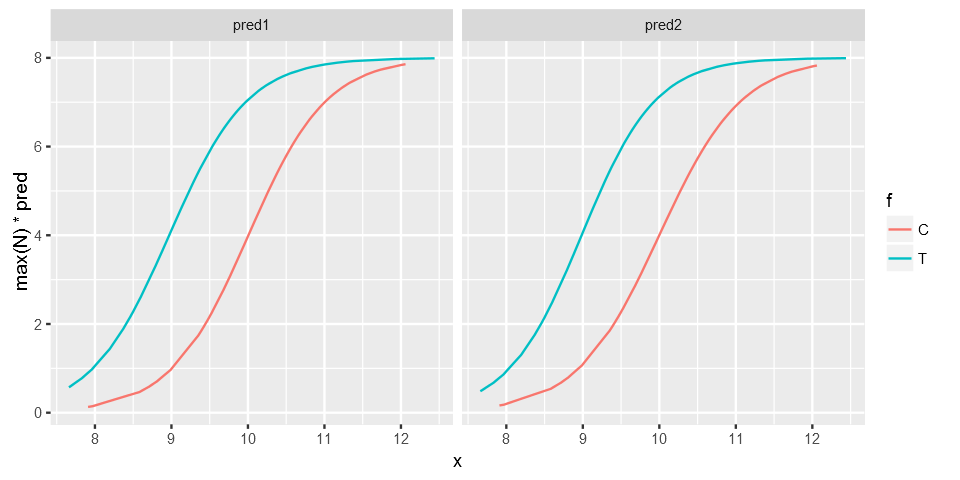

In [31]:
d %>>% 
    mutate(pred1 = predict(fit.xf, newdata = data_frame(x = d$x, f = d$f), type = "response"), 
          pred2 = predict(fit.xf.i, newdata = data_frame(x = d$x, f = d$f), type = "response")) %>>% 
    gather(model, pred, pred1:pred2) %>>% 
    ggplot(aes(x = x, y = max(N) * pred, group = f, colour = f)) + 
        geom_line() + 
        facet_wrap(~model)

## 6.6

In [40]:
d2 <- read_csv("data/chap06/data4b.csv")
str(d2)

Parsed with column specification:
cols(
  y = col_integer(),
  x = col_double(),
  A = col_double()
)


Classes 'tbl_df', 'tbl' and 'data.frame':	100 obs. of  3 variables:
 $ y: int  57 64 49 64 82 29 37 33 61 46 ...
 $ x: num  0.68 0.27 0.46 0.45 0.74 0.15 0.5 0.57 0.79 0.57 ...
 $ A: num  10.3 15.6 10 14.9 14 9.6 11.8 6.8 11.8 9.5 ...
 - attr(*, "spec")=List of 2
  ..$ cols   :List of 3
  .. ..$ y: list()
  .. .. ..- attr(*, "class")= chr  "collector_integer" "collector"
  .. ..$ x: list()
  .. .. ..- attr(*, "class")= chr  "collector_double" "collector"
  .. ..$ A: list()
  .. .. ..- attr(*, "class")= chr  "collector_double" "collector"
  ..$ default: list()
  .. ..- attr(*, "class")= chr  "collector_guess" "collector"
  ..- attr(*, "class")= chr "col_spec"


In [76]:
options(repr.plot.width = 5)

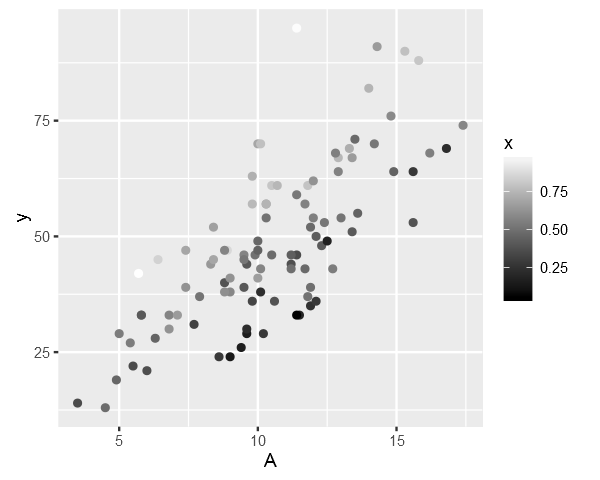

In [77]:
ggplot(d2, aes(x = A, y = y)) + 
    geom_point(aes(colour = x)) + 
    scale_colour_gradient(low = "black", high = "white")

In [45]:
fit.offset <- glm(y ~ x, offset = log(A), family = poisson, data = d2)
fit.offset


Call:  glm(formula = y ~ x, family = poisson, data = d2, offset = log(A))

Coefficients:
(Intercept)            x  
     0.9731       1.0383  

Degrees of Freedom: 99 Total (i.e. Null);  98 Residual
Null Deviance:	    261.5 
Residual Deviance: 81.61 	AIC: 650.3

In [87]:
paste0("pred.0", 0.1*10, collapse = "")

[1] "pred.01"

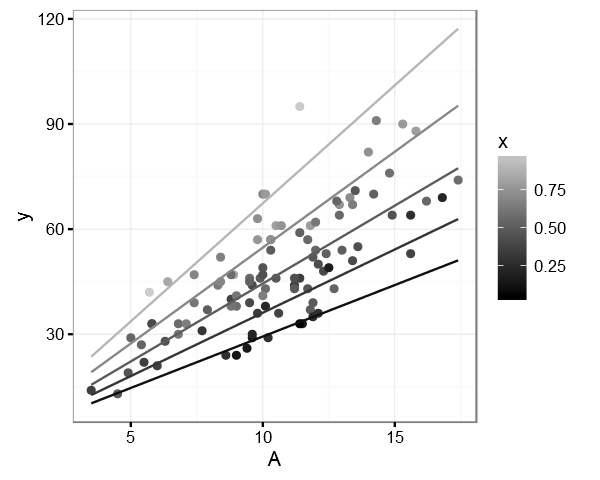

In [109]:
seq(0.1, 0.9, 0.2) %>>% lapply(function(x){
    d <- data_frame(x = x, A = d2$A)
    pred <- predict(fit.offset, newdata = d, type = "response")
    ret <- data_frame(pred)
    names(ret) <- as.character(x)
    ret
}) %>>% {bind_cols(d2["A"], (.))} %>>% 
    gather(x, pred, `0.1`:`0.9`, convert = TRUE) %>>% 
    ggplot() + 
        geom_point(data = d2, aes(x = A, y = y, colour = x)) + 
        geom_line(aes(x = A, y = pred, group = x, colour = x)) + 
        scale_colour_gradient(low = "black", high = gray(0.8)) + 
        theme_bw()

## 6.7

In [114]:
library(gridExtra)


Attaching package: 'gridExtra'

The following object is masked from 'package:dplyr':

    combine



In [118]:
options(repr.plot.width = 8, repr.plot.height = 8/3)

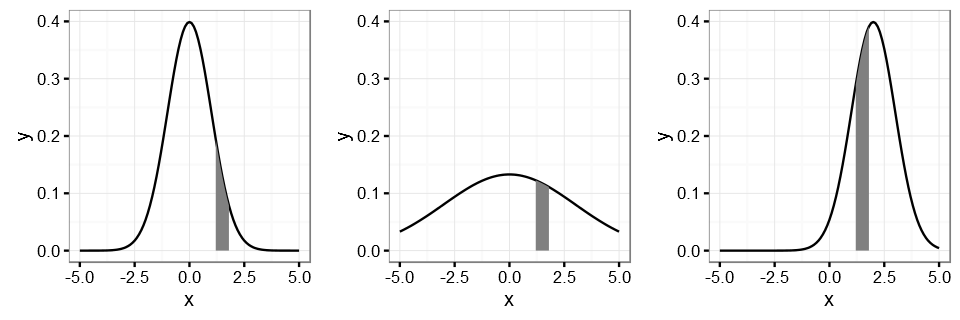

In [124]:
list(c(mean = 0, sd = 1), c(mean = 0, sd = 3), c(mean = 2, sd = 1)) %>>% 
    lapply(function(x){
        ggplot(data_frame(x = c(-5, 5)), aes(x)) + 
            stat_function(geom = "line", fun = dnorm, args = list(mean = x["mean"], sd = x["sd"])) + 
            theme_bw() + 
            geom_area(stat = "function", fun = dnorm, args = list(mean = x["mean"], sd = x["sd"]), 
                      fill = gray(0.5), xlim = c(1.2, 1.8)) + 
            scale_y_continuous(limit = c(0, 0.4))
    }) %>>% 
    {do.call(grid.arrange, c((.), list(ncol = 3)))}

In [125]:
pnorm(1.8, 0, 1) - pnorm(1.2, 0, 1)

[1] 0.07913935

In [126]:
dnorm(1.5, 0, 1) * (1.8 - 1.2)

[1] 0.07771056

# 6.8

ガンマ分布

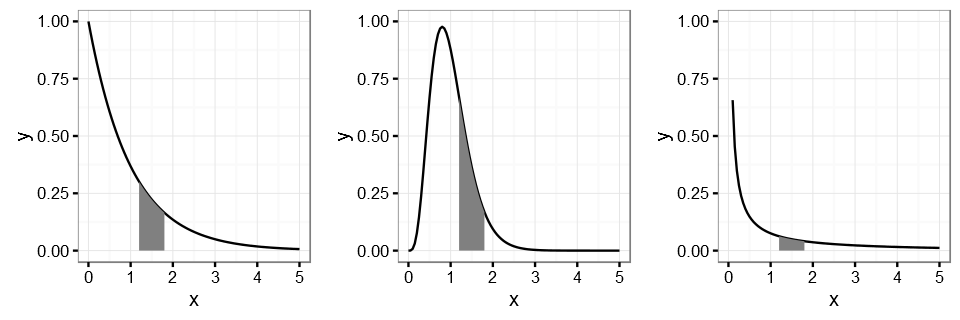

In [129]:
list(c(r = 1), c(r = 5), c(r = 0.1)) %>>% 
    lapply(function(x){
        ggplot(data_frame(x = c(0, 5)), aes(x)) + 
            stat_function(geom = "line", fun = dgamma, args = list(shape = x["r"], rate = x["r"])) + 
            theme_bw() + 
            geom_area(stat = "function", fun = dgamma, args = list(shape = x["r"], rate = x["r"]), 
                      fill = gray(0.5), xlim = c(1.2, 1.8)) + 
            scale_y_continuous(limit = c(0, 1))
    }) %>>% 
    {do.call(grid.arrange, c((.), list(ncol = 3)))}

むやみに`load()` すると，変数が上書きされるかもしれないので，環境を切る

In [127]:
tmp = new.env()
load("data/chap06/d.RData", envir = tmp)
ls(tmp)

[1] "d" "p"

In [128]:
ls.str(tmp)

d : 'data.frame':	50 obs. of  2 variables:
 $ x: num  0.001 0.0173 0.0336 0.0499 0.0662 ...
 $ y: num  0.000887 0.023465 0.069876 0.03434 0.02652 ...
p : List of 3
 $ b1   : num -1
 $ b2   : num 0.7
 $ theta: num 3

In [131]:
options(repr.plot.width = 4, repr.plot.height = 4)

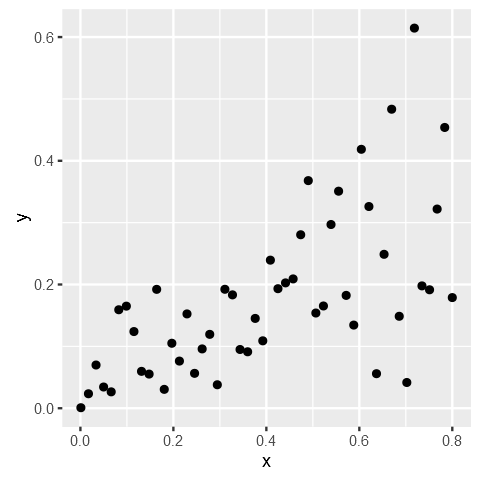

In [132]:
tmp$d %>>% 
    ggplot(aes(x = x, y = y)) + 
        geom_point()

In [134]:
fit.gamma <- glm(y ~ log(x), family = Gamma(link = "log"), data = tmp$d)
fit.gamma


Call:  glm(formula = y ~ log(x), family = Gamma(link = "log"), data = tmp$d)

Coefficients:
(Intercept)       log(x)  
    -1.0403       0.6833  

Degrees of Freedom: 49 Total (i.e. Null);  48 Residual
Null Deviance:	    35.37 
Residual Deviance: 17.25 	AIC: -110.9

In [136]:
attributes(fit.gamma)

$names
 [1] "coefficients"      "residuals"         "fitted.values"    
 [4] "effects"           "R"                 "rank"             
 [7] "qr"                "family"            "linear.predictors"
[10] "deviance"          "aic"               "null.deviance"    
[13] "iter"              "weights"           "prior.weights"    
[16] "df.residual"       "df.null"           "y"                
[19] "converged"         "boundary"          "model"            
[22] "call"              "formula"           "terms"            
[25] "data"              "offset"            "control"          
[28] "method"            "contrasts"         "xlevels"          

$class
[1] "glm" "lm"

In [141]:
options(repr.plot.width = 4, repr.plot.height = 3)

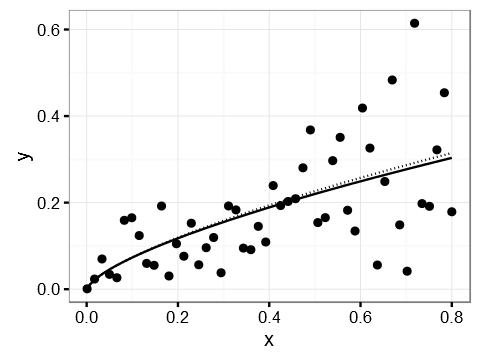

In [150]:
ggplot(tmp$d, aes(x = x, y = y)) + 
    theme_bw() + 
    geom_point() + 
    stat_function(geom = "line", fun = function(x){exp(tmp$p[["b1"]] + tmp$p[["b2"]] * log(x))}, linetype = "dotted") + 
    geom_line(data = data_frame(x = tmp$d$x, 
                         pred = predict(fit.gamma, newdata = data_frame(x = tmp$d$x), type = "response")), 
              mapping = aes(x = x, y = pred)) + 
    